In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [92]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family="Malgun Gothic") #한글인코딩
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

In [103]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [30]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

In [31]:
ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [32]:
ada.score(x_train, y_train)

1.0

In [33]:
ada.score(x_test, y_test)

0.986013986013986

In [34]:
n_features = cancer.data.shape[1]

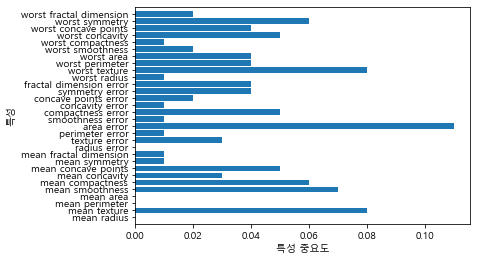

In [35]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

### Gradient Boost Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

In [38]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
gb.score(x_train, y_train)

1.0

In [40]:
gb.score(x_test, y_test)

0.965034965034965

### 사전 가지치기

In [41]:
gb = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=1)

In [42]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [43]:
gb.score(x_train, y_train)

0.9906103286384976

In [44]:
gb.score(x_test, y_test)

0.972027972027972

### 학습률 낮추기

In [66]:
#learning rate
gb = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.01)

In [67]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [68]:
gb.score(x_train, y_train)

0.9882629107981221

In [69]:
gb.score(x_test, y_test)

0.965034965034965

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
gb = GradientBoostingRegressor(random_state=0, n_estimators=100, criterion='mse')

In [87]:
gb.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: F

GradientBoostingRegressor(criterion='mse', random_state=0)

In [88]:
pred = gb.predict(x_test)
pred

array([16.11928331, 21.93186825, 14.80080418, 22.96353864, 20.89363179,
       23.38666472, 13.51325836, 22.02150442, 19.84382254, 43.89593945,
       22.53767142, 21.66090545, 17.34342902, 30.99362567, 20.12888162,
        9.58989239, 20.33675837, 20.20117085, 14.70348625, 23.51111108,
       25.06488381, 26.56638908, 30.14423204, 20.57215006, 19.35297756,
       21.2878338 , 29.37506328, 43.67582777, 19.90950642, 20.12394867,
       12.77808625, 31.46981683, 14.49340694, 31.02070298, 13.36563644,
       17.63418816, 20.11173346, 15.8663691 ,  9.40859593, 18.66076696,
       27.05394902, 23.61349857, 20.69347897, 15.7072109 , 18.73462186,
        9.38660164, 35.45242876,  8.63925531,  6.53759042, 11.06352648,
       12.86858863, 33.47371245, 21.48218803, 19.37350385, 13.7799502 ,
       17.71312157, 24.59159733, 14.98265032, 26.5718546 , 25.67306826,
       19.6315741 , 28.09598381, 22.73156414, 31.0321044 , 22.33147742,
       15.68394211, 19.99392113, 15.79608851, 12.96703955, 21.98

In [89]:
gb.score(x_train, y_train)

0.9812008882236382

In [90]:
gb.score(x_test, y_test)

0.8986799875657603

### XGBoost Classifier

In [94]:
!pip install xgboost

In [115]:
import xgboost as xgb

In [96]:
xgb = xgb.XGBClassifier(random_state=0)

In [97]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [99]:
xgb.score(x_train, y_train)

1.0

In [100]:
xgb.score(x_test,y_test)

0.986013986013986

### 사전 가지치기

In [104]:
xgb = xgb.XGBClassifier(random_state=0, max_depth=1)

In [105]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [106]:
xgb.score(x_train, y_train)

0.9976525821596244

In [107]:
xgb.score(x_test,y_test)

0.986013986013986

### 학습률 낮추기

In [130]:
import xgboost as xgb

In [122]:
xgb = xgb.XGBClassifier(random_state=0, max_depth=1, learning_rate=0.01)

In [123]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [124]:
xgb.score(x_train, y_train)

0.9530516431924883

In [125]:
xgb.score(x_test,y_test)

0.951048951048951

#### 회귀모델

In [126]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [127]:
#평가지표 라이브러리 불러옴
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [128]:
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [18]:
ada = AdaBoostRegressor(n_estimators=100, random_state=0)

In [19]:
ada.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [20]:
pred = ada.predict(x_test)
pred

array([16.65700935, 21.02592593, 20.75407407, 36.90760234, 12.42875   ,
       21.68345324, 22.48974359, 20.44150943, 16.49030303, 27.4675    ,
       16.00163934, 16.00163934, 23.14516129, 16.65700935, 29.79354839,
       23.19853659, 45.2654321 , 24.36203704, 17.74150943, 16.49030303,
       19.39855072, 23.19853659, 22.48974359, 20.44150943, 19.6254902 ,
       17.23448276, 28.17419355, 25.59174757, 15.84108527, 13.24      ,
       22.2091954 , 13.96696429, 21.12330827, 19.71719745, 16.65700935,
       21.73809524, 26.87820513, 21.89934211, 24.8       , 13.27474747,
       18.84516129, 21.02592593, 16.60671141, 20.75407407, 20.00933333,
       24.95882353, 20.20217391, 29.78421053, 20.75407407, 12.42875   ,
       20.00933333, 45.63548387, 26.0625    , 45.146875  , 23.10319149,
       22.44      , 39.27777778, 23.28148148, 20.44150943, 21.49333333,
       18.51801802, 12.9042735 , 21.97631579, 18.96956522, 22.48974359,
       18.51801802, 21.73809524, 21.68345324, 21.52125   , 11.61

In [21]:
ada.score(x_train, y_train)

0.9157897781552377

In [22]:
ada.score(x_test, y_test)

0.8250352204123226

In [150]:
import xgboost as xgb

In [160]:
r = xgb.XGBRegressor(n_estimators=100, learning_rate=0.01, gamma= 10, max_depth=2, random_state=0)

In [161]:
r.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=10, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [153]:
#xgb.plot_importances(rgb)

AttributeError: module 'xgboost' has no attribute 'plot_importances'

In [154]:
pred = r.predict(x_test)
pred

array([ 9.917244 , 15.045992 , 15.045992 ,  8.544994 , 16.427143 ,
       15.390454 , 15.390454 , 10.985174 ,  8.544994 , 15.17024  ,
       15.390454 , 13.341181 , 10.18511  , 15.045992 , 13.684075 ,
       13.721382 , 20.376211 ,  8.544994 , 13.740096 ,  8.967904 ,
        8.544994 , 15.008685 , 12.756615 , 16.082682 , 11.926913 ,
        8.544994 , 10.464503 , 16.082682 ,  8.544994 , 16.082682 ,
       20.491625 , 13.341181 , 19.939198 , 15.390454 ,  9.637851 ,
       15.197507 , 13.341181 , 17.347645 , 15.045992 , 17.384953 ,
       21.652666 , 12.99162  , 10.552123 , 15.541969 , 10.18511  ,
       11.186208 , 26.089436 , 11.223515 , 17.169127 , 20.226278 ,
       13.341181 ,  8.544994 , 10.50181  , 20.376211 ,  8.900094 ,
       10.147803 , 12.24833  ,  8.910439 , 15.541969 , 13.341181 ,
       27.25545  ,  8.544994 ,  9.243771 , 13.684075 ,  8.544994 ,
       27.25545  , 18.593252 , 16.095129 , 12.62853  , 13.341181 ,
       15.390454 , 15.045992 , 17.359333 , 15.197507 , 15.6543

In [156]:
r.score(x_train, y_train) #r2 아닌 오차로 표시...?why?

-0.12817684106194016

In [157]:
r.score(x_test, y_test)

-0.21616979468958197